In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:

!pip install yfinance
!pip install yahoofinancials

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

df = yf.download('BKNG', 
                      start='2000-02-10', 
                      end='2022-05-21', 
                      progress=False,
)

print(df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-02-10   350.625000   351.000000   336.000000   337.500000   337.500000   
2000-02-11   339.000000   339.750000   321.000000   323.250000   323.250000   
2000-02-14   329.625000   334.125000   323.250000   326.250000   326.250000   
2000-02-15   331.500000   331.500000   313.500000   318.000000   318.000000   
2000-02-16   317.250000   321.750000   312.750000   317.625000   317.625000   
...                 ...          ...          ...          ...          ...   
2022-05-16  2086.110107  2094.590088  2033.609985  2046.010010  2046.010010   
2022-05-17  2125.000000  2161.000000  2109.860107  2146.590088  2146.590088   
2022-05-18  2120.000000  2134.060059  2042.000000  2050.379883  2050.379883   
2022-05-19  2059.620117  2142.429932  2042.579956  2103.399902  2103.399902   
2022-05-20  2127.770020  2132.280029  2052.850098  2

In [6]:
df_yahoo = yf.download( 'BKNG',
start= '2000-02-10',
end='2022-04-20',
progress=False)

In [7]:
df_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-10,350.625,351.000,336.00,337.500,337.500,307933
2000-02-11,339.000,339.750,321.00,323.250,323.250,235717
2000-02-14,329.625,334.125,323.25,326.250,326.250,228417
2000-02-15,331.500,331.500,313.50,318.000,318.000,221433
2000-02-16,317.250,321.750,312.75,317.625,317.625,193033


In [8]:
df = df_yahoo
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-10,350.625,351.000,336.00,337.500,337.500,307933
2000-02-11,339.000,339.750,321.00,323.250,323.250,235717
2000-02-14,329.625,334.125,323.25,326.250,326.250,228417
2000-02-15,331.500,331.500,313.50,318.000,318.000,221433
2000-02-16,317.250,321.750,312.75,317.625,317.625,193033


In [9]:
df.index

DatetimeIndex(['2000-02-10', '2000-02-11', '2000-02-14', '2000-02-15',
               '2000-02-16', '2000-02-17', '2000-02-18', '2000-02-22',
               '2000-02-23', '2000-02-24',
               ...
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-18', '2022-04-19'],
              dtype='datetime64[ns]', name='Date', length=5583, freq=None)

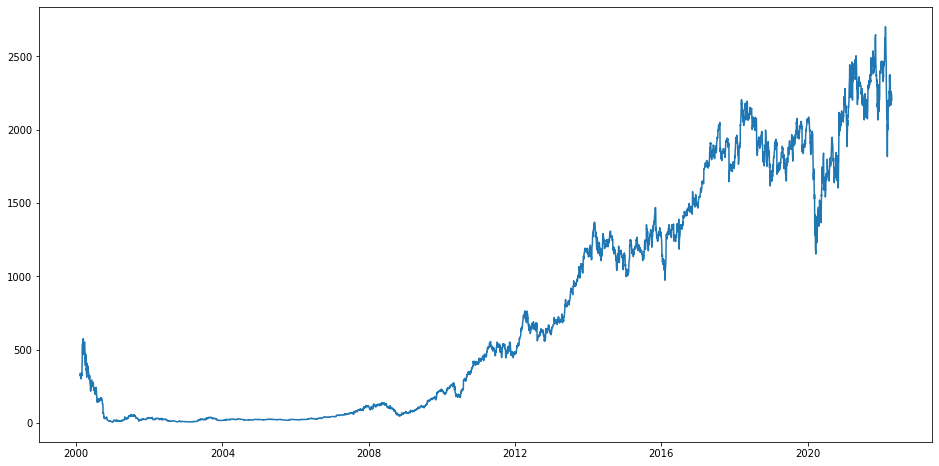

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"], label='Closing Price')

In [11]:
data = df.sort_index(ascending=True, axis=0)
df2 = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
for i in range(0,len(data)):
    df2['Date'][i]=data.index[i]
    df2["Close"][i]=data["Close"][i]

In [12]:
df2

,Date,Close
0,2000-02-10 00:00:00,337.5
1,2000-02-11 00:00:00,323.25
2,2000-02-14 00:00:00,326.25
3,2000-02-15 00:00:00,318.0
4,2000-02-16 00:00:00,317.625
...,...,...
5578,2022-04-12 00:00:00,2181.379883
5579,2022-04-13 00:00:00,2260.110107
5580,2022-04-14 00:00:00,2227.290039
5581,2022-04-18 00:00:00,2199.310059


In [13]:
df2["Date"]=pd.to_datetime(df2.Date,format="%Y-%m-%d")


In [14]:
df2

,Date,Close
0,2000-02-10,337.5
1,2000-02-11,323.25
2,2000-02-14,326.25
3,2000-02-15,318.0
4,2000-02-16,317.625
...,...,...
5578,2022-04-12,2181.379883
5579,2022-04-13,2260.110107
5580,2022-04-14,2227.290039
5581,2022-04-18,2199.310059


In [15]:
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
length_df2 = len(df2)
train_length = int(length_df2*(70/100))

test_start = train_length+1
test_start

3909

In [17]:
final_dataset = df2.values

train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]

df2.index = df2.Date
df2.drop("Date",axis=1,inplace=True)

final_dataset = df2.values

In [18]:
df2

,Close
Date,
2000-02-10,337.5
2000-02-11,323.25
2000-02-14,326.25
2000-02-15,318.0
2000-02-16,317.625
...,...
2022-04-12,2181.379883
2022-04-13,2260.110107
2022-04-14,2227.290039


In [19]:
final_dataset

array([[337.5],
       [323.25],
       [326.25],
       ...,
       [2227.2900390625],
       [2199.31005859375],
       [2239.3798828125]], dtype=object)

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
scaled_data

array([[0.12270735],
       [0.11742303],
       [0.11853552],
       ...,
       [0.82349648],
       [0.81312069],
       [0.82797975]])

In [21]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [22]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

In [23]:
print(x_train_data.shape[0])

3848


In [24]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [25]:
x_train_data.shape[1]

60

In [26]:
#lstm model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=df2[len(df2)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=50,batch_size=10,verbose=2)

Epoch 1/50
385/385 - 23s - loss: 5.1828e-04 - 23s/epoch - 60ms/step
Epoch 2/50
385/385 - 18s - loss: 1.0003e-04 - 18s/epoch - 48ms/step
Epoch 3/50
385/385 - 18s - loss: 6.7103e-05 - 18s/epoch - 47ms/step
Epoch 4/50
385/385 - 22s - loss: 8.2347e-05 - 22s/epoch - 57ms/step
Epoch 5/50
385/385 - 18s - loss: 6.8460e-05 - 18s/epoch - 47ms/step
Epoch 6/50
385/385 - 19s - loss: 5.4033e-05 - 19s/epoch - 48ms/step
Epoch 7/50
385/385 - 18s - loss: 4.1385e-05 - 18s/epoch - 48ms/step
Epoch 8/50
385/385 - 18s - loss: 4.8137e-05 - 18s/epoch - 47ms/step
Epoch 9/50
385/385 - 18s - loss: 4.0192e-05 - 18s/epoch - 47ms/step
Epoch 10/50
385/385 - 18s - loss: 2.8239e-05 - 18s/epoch - 47ms/step
Epoch 11/50
385/385 - 18s - loss: 3.4918e-05 - 18s/epoch - 46ms/step
Epoch 12/50
385/385 - 18s - loss: 2.7240e-05 - 18s/epoch - 47ms/step
Epoch 13/50
385/385 - 18s - loss: 2.9558e-05 - 18s/epoch - 47ms/step
Epoch 14/50
385/385 - 18s - loss: 2.8008e-05 - 18s/epoch - 46ms/step
Epoch 15/50
385/385 - 18s - loss: 2.1132e-0

In [27]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [28]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [29]:
lstm_model.save("saved_model.h5")

In [30]:
predicted_closing_price.shape

(1674, 1)

In [31]:
type(valid_data)

numpy.ndarray

In [32]:
(train_data)

array([[Timestamp('2000-02-10 00:00:00'), 337.5],
       [Timestamp('2000-02-11 00:00:00'), 323.25],
       [Timestamp('2000-02-14 00:00:00'), 326.25],
       ...,
       [Timestamp('2015-08-20 00:00:00'), 1257.5400390625],
       [Timestamp('2015-08-21 00:00:00'), 1216.9200439453125],
       [Timestamp('2015-08-24 00:00:00'), 1174.1199951171875]],
      dtype=object)

In [33]:
train_data=df2[:2200]
valid_data=df2[2201:]
train_data=final_dataset[0:train_length,:]
valid_data=final_dataset[test_start:,:]
predicted_closing_price = np.array(predicted_closing_price)

#new_data = pd.DataFrame({
#'Close' : X_test,
#'Pred'  : predicted_closing_price })


#valid_data['Predictions']=predicted_closing_price
#plt.plot(train_data["Close"])
#plt.plot(new_data[['Close',"Predictions"]])

In [34]:
df3= df2.copy(deep=True)
df3 = df3[test_start:]
df3.shape

(1674, 1)

In [35]:
df3['Pred'] = predicted_closing_price

In [36]:
df3

,Close,Pred
Date,,
2015-08-26,1223.459961,1181.512939
2015-08-27,1252.01001,1226.915283
2015-08-28,1259.390015,1247.796875
2015-08-31,1248.640015,1251.815674
2015-09-01,1215.359985,1239.529785
...,...,...
2022-04-12,2181.379883,2098.693359
2022-04-13,2260.110107,2101.961670
2022-04-14,2227.290039,2189.623291


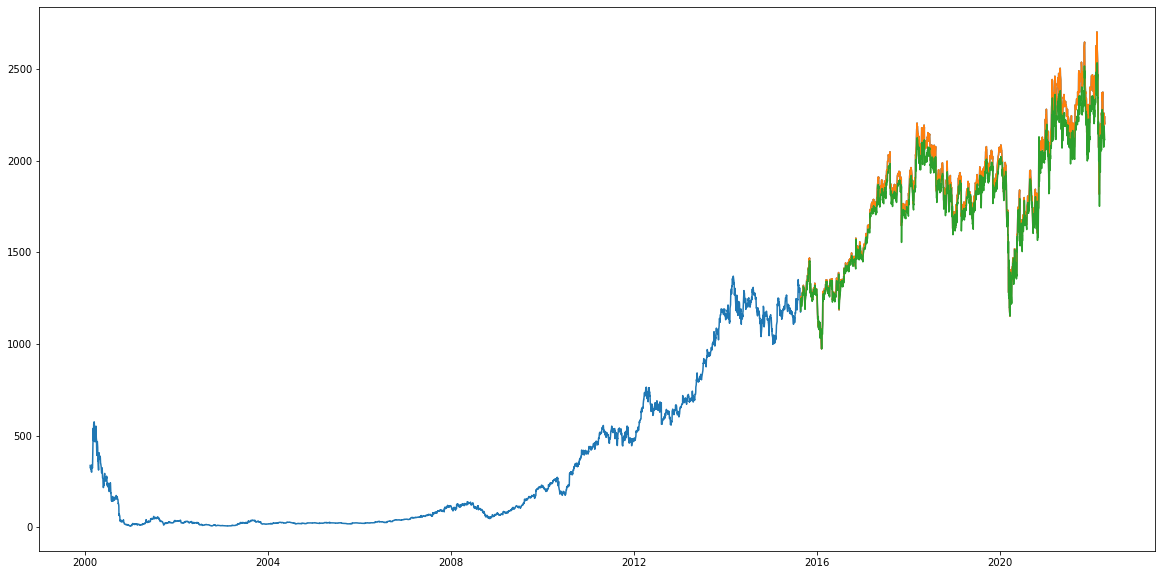

In [37]:
plt.plot(df2['Close'])
plt.plot(df3[['Close',"Pred"]])

In [38]:
X_test.shape

(1674, 60, 1)

In [39]:
predicted_closing_price.shape

(1674, 1)

In [40]:
df3

,Close,Pred
Date,,
2015-08-26,1223.459961,1181.512939
2015-08-27,1252.01001,1226.915283
2015-08-28,1259.390015,1247.796875
2015-08-31,1248.640015,1251.815674
2015-09-01,1215.359985,1239.529785
...,...,...
2022-04-12,2181.379883,2098.693359
2022-04-13,2260.110107,2101.961670
2022-04-14,2227.290039,2189.623291


In [41]:
from numpy import sqrt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error
print (sqrt(mean_squared_error( df3['Close'] , df3['Pred'] )) )

69.88898531839102


In [42]:
import math
from sklearn.metrics import mean_squared_error, r2_score

testScore = math.sqrt(mean_squared_error(df3['Close'] , df3['Pred'] ))
print('Root Mean Square Error Score: %.2f RMSE' % (testScore))

r2 = r2_score(df3['Close'] , df3['Pred'])
print ('R2 score: %.2f R2' %(r2))

Root Mean Square Error Score: 69.89 RMSE
R2 score: 0.96 R2


In [44]:
df2

,Close
Date,
2000-02-10,337.5
2000-02-11,323.25
2000-02-14,326.25
2000-02-15,318.0
2000-02-16,317.625
...,...
2022-04-12,2181.379883
2022-04-13,2260.110107
2022-04-14,2227.290039


In [45]:
valid_data

array([[1223.4599609375],
       [1252.010009765625],
       [1259.3900146484375],
       ...,
       [2227.2900390625],
       [2199.31005859375],
       [2239.3798828125]], dtype=object)

In [46]:
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plotdf = pd.DataFrame({'date': df2.index,
                       'original_close': df3['Close'],
                       'train_predicted_close' : df2['Close'],
                      'test_predicted_close': df3['Pred']})

In [47]:
title_variable = " " + 'BKNG' +" Stock Prediction"

fig = px.line(plotdf,x=plotdf['date'], y=plotdf['original_close'], title=title_variable)
fig.add_traces(
    list(px.line(plotdf,x='date', y='test_predicted_close', color_discrete_sequence = ['red'] ).select_traces() )
)

fig.add_traces(
    list(px.line(plotdf,x='date', y='train_predicted_close' , color_discrete_sequence = ['green']).select_traces() )
)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Close",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()

In [48]:
look_back = 60

In [49]:
df['Close'].shape

(5583,)

In [50]:
close_data = df['Close'].values

close_data = close_data.reshape((-1))

In [51]:
def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [52]:
num_prediction = 60
forecast = predict(num_prediction, lstm_model)
forecast_dates = predict_dates(num_prediction)

In [53]:
Xtest=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


forecast_new = scaler.inverse_transform(forecast.reshape(-1,1))

In [54]:
forecast

array([2.23937988e+03, 2.42898917e+00, 1.60852957e+00, 1.57075715e+00,
       1.63389540e+00, 1.61842203e+00, 1.61296201e+00, 1.58204377e+00,
       1.48001575e+00, 1.33130741e+00, 1.17445612e+00, 1.02636182e+00,
       8.96258950e-01, 7.94001579e-01, 7.19557464e-01, 6.67131901e-01,
       6.32654190e-01, 6.12646937e-01, 6.02728605e-01, 5.98537147e-01,
       5.96724808e-01, 5.95199108e-01, 5.92915297e-01, 5.89539051e-01,
       5.85138142e-01, 5.79958797e-01, 5.74287713e-01, 5.68381250e-01,
       5.62437475e-01, 5.56593239e-01, 5.50932586e-01, 5.45500100e-01,
       5.40312707e-01, 5.35369933e-01, 5.30661523e-01, 5.26172042e-01,
       5.21885216e-01, 5.17784715e-01, 5.13855696e-01, 5.10084927e-01,
       5.06460428e-01, 5.02972066e-01, 4.99610722e-01, 4.96368349e-01,
       4.93237853e-01, 4.90212619e-01, 4.87286687e-01, 4.84454632e-01,
       4.81711447e-01, 4.79052365e-01, 4.76473033e-01, 4.73969638e-01,
       4.71538246e-01, 4.69175220e-01, 4.66877222e-01, 4.64641392e-01,
      

In [55]:
fig_new = px.line(plotdf,x=forecast_dates, y=forecast, title=title_variable)
fig_new.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig_new.show()

In [ ]:
#ARIMA

In [ ]:
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [ ]:
df4= df.copy(deep=True)

In [ ]:
df4.reset_index(inplace=True)

In [ ]:
df4


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-10,350.625000,351.000000,336.000000,337.500000,337.500000,307933
1,2000-02-11,339.000000,339.750000,321.000000,323.250000,323.250000,235717
2,2000-02-14,329.625000,334.125000,323.250000,326.250000,326.250000,228417
3,2000-02-15,331.500000,331.500000,313.500000,318.000000,318.000000,221433
4,2000-02-16,317.250000,321.750000,312.750000,317.625000,317.625000,193033
...,...,...,...,...,...,...,...
5578,2022-04-12,2196.949951,2232.370117,2172.820068,2181.379883,2181.379883,278400
5579,2022-04-13,2192.250000,2272.310059,2190.689941,2260.110107,2260.110107,328400
5580,2022-04-14,2277.000000,2307.459961,2213.449951,2227.290039,2227.290039,402200
5581,2022-04-18,2210.000000,2226.179932,2173.000000,2199.310059,2199.310059,329400


In [ ]:
import statsmodels.api as sm

In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

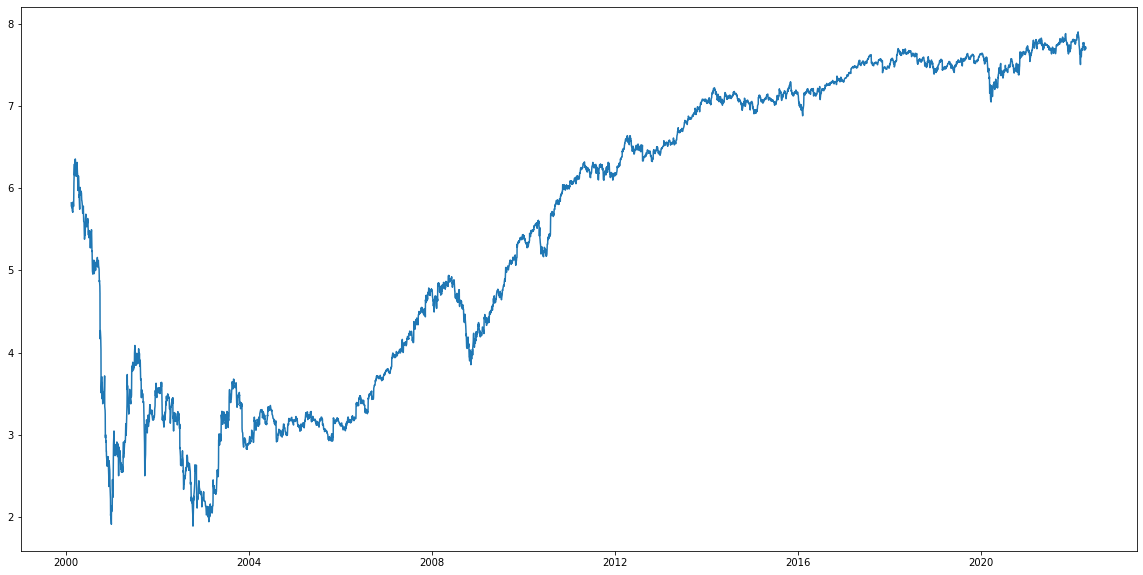

In [ ]:
df_log = np.log(df2.astype(np.float64))
plt.plot(df_log)

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

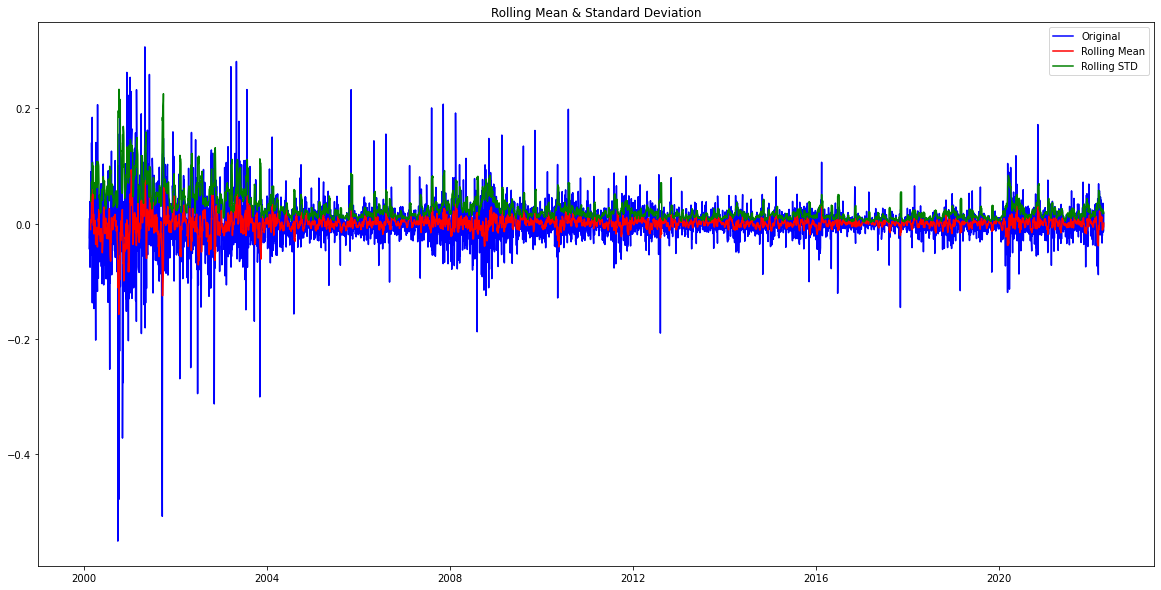

ADF Statistic: -11.83024817526261
p value: 8.022952440739564e-22
Critical Values:
	1%: -3.4315285852166277
	5%: -2.8620608185993297
	10%: -2.5670472304152314


In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

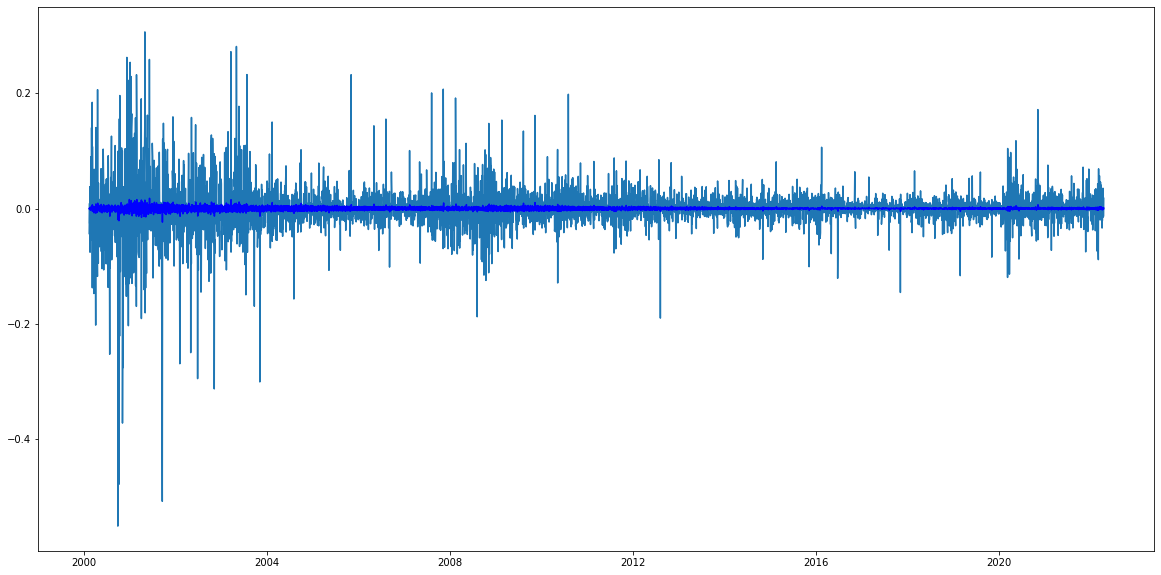

In [ ]:
decomposition = seasonal_decompose(df_log, freq=52) 
model = ARIMA(df_log, order=(4,1,2))
results = model.fit(disp=0)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='blue')

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [ ]:
df_log

,Close
Date,
2000-02-10,5.821566
2000-02-11,5.778426
2000-02-14,5.787664
2000-02-15,5.762051
2000-02-16,5.760871
...,...
2022-04-12,7.687713
2022-04-13,7.723169
2022-04-14,7.708541


In [ ]:
predictions_ARIMA_log = pd.Series(df_log['Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

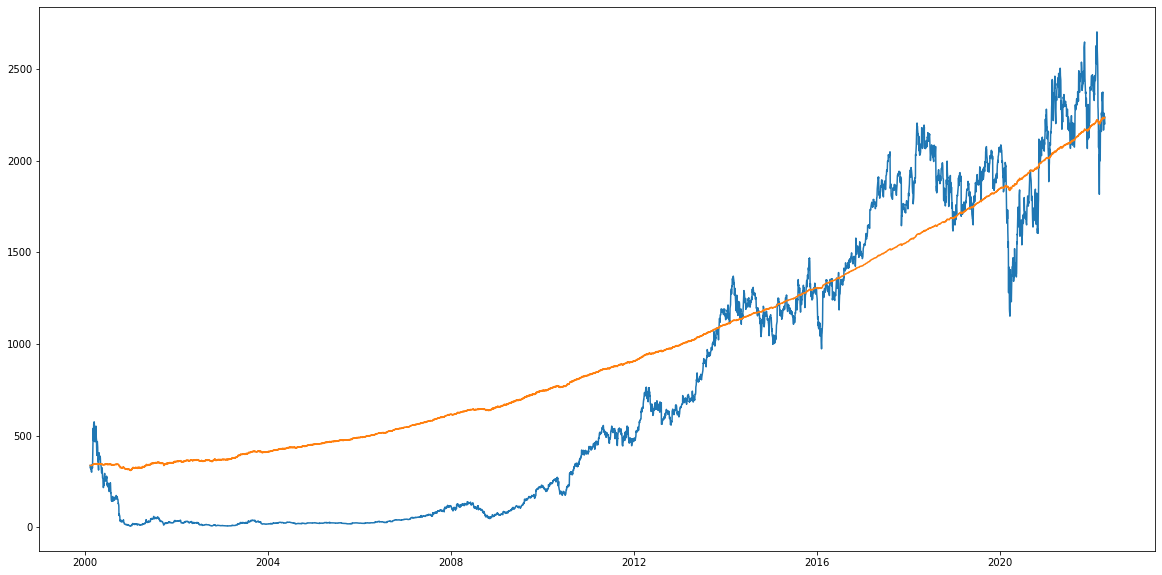

In [ ]:
plt.plot(df2)
plt.plot(predictions_ARIMA)

In [ ]:
df2.reset_index(inplace=True)
df2

,Date,Close
0,2000-02-10,337.5
1,2000-02-11,323.25
2,2000-02-14,326.25
3,2000-02-15,318.0
4,2000-02-16,317.625
...,...,...
5578,2022-04-12,2181.379883
5579,2022-04-13,2260.110107
5580,2022-04-14,2227.290039
5581,2022-04-18,2199.310059


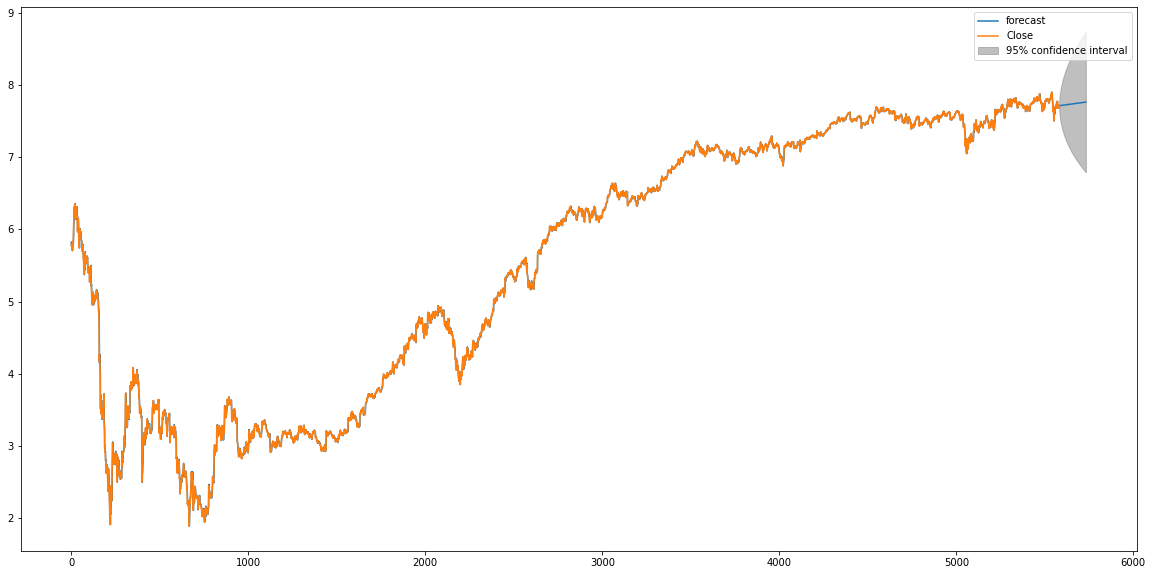

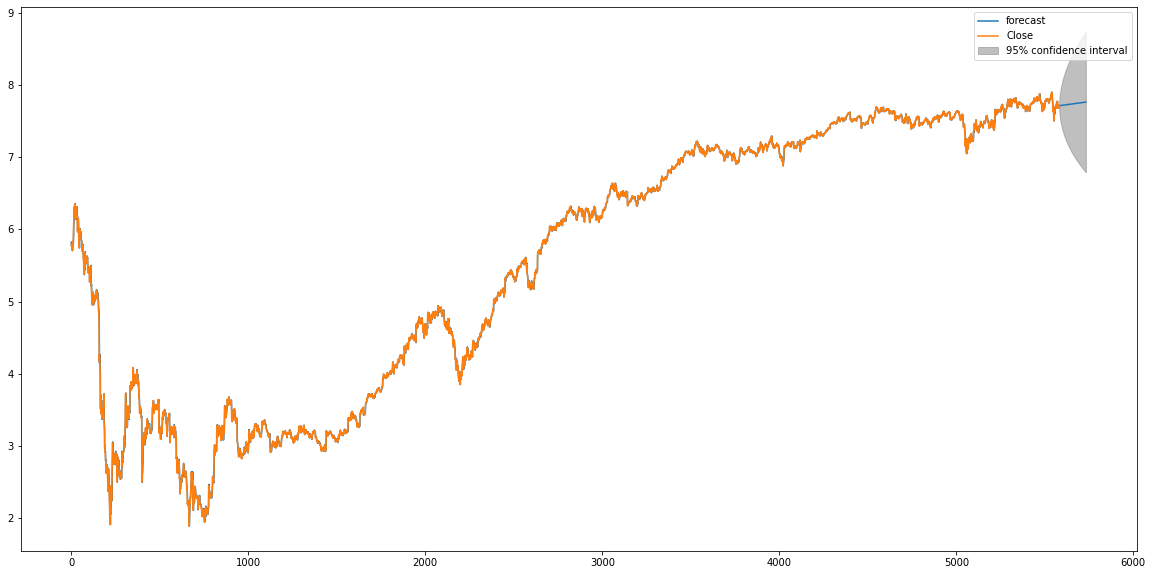

In [ ]:
pd.plotting.register_matplotlib_converters()
results.plot_predict(1, len(df2)+150)

In [ ]:
type(results)

pred_uc_ci = results.conf_int(alpha=0.05)
pred_uc_ci

,0,1
const,-0.000722,0.001398
ar.L1.D.Close,-0.701495,-0.651216
ar.L2.D.Close,-0.996026,-0.941612
ar.L3.D.Close,0.012251,0.067558
ar.L4.D.Close,-0.019414,0.028586
ma.L1.D.Close,0.711406,0.716342
ma.L2.D.Close,0.994963,1.001354


In [ ]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5582
Model:                 ARIMA(4, 1, 2)   Log Likelihood               10223.572
Method:                       css-mle   S.D. of innovations              0.039
Date:                Wed, 18 May 2022   AIC                         -20431.144
Time:                        18:33:26   BIC                         -20378.125
Sample:                             1   HQIC                        -20412.665
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.625      0.532      -0.001       0.001
ar.L1.D.Close    -0.6764      0.013    -52.731      0.000      -0.701      -0.651
ar.L2.D.Close    -0.9688      0.014    -